# ***Predict Autism Spectrum Disorder in Child***

![pic1](signs_of_autism.jpg)
![pic2](signs_of_autism1.jpg)

#### **Import the required packages**

In [169]:
import numpy as np
import pandas as pd
import scipy.io.arff as arff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

#### **Import the ARFF(Attribute Relational File Format) Dataset file**

In [170]:
arff.loadarff('Autism-Child-Data.arff')[0]

array([(b'1', b'1', b'0', b'0', b'1', b'1', b'0', b'1', b'0', b'0',  6., b'm', b'Others', b'no', b'no', b'Jordan', b'no',  5., b'4-11 years', b'Parent', b'NO'),
       (b'1', b'1', b'0', b'0', b'1', b'1', b'0', b'1', b'0', b'0',  6., b'm', b'Middle Eastern ', b'no', b'no', b'Jordan', b'no',  5., b'4-11 years', b'Parent', b'NO'),
       (b'1', b'1', b'0', b'0', b'0', b'1', b'1', b'1', b'0', b'0',  6., b'm', b'?', b'no', b'no', b'Jordan', b'yes',  5., b'4-11 years', b'?', b'NO'),
       (b'0', b'1', b'0', b'0', b'1', b'1', b'0', b'0', b'0', b'1',  5., b'f', b'?', b'yes', b'no', b'Jordan', b'no',  4., b'4-11 years', b'?', b'NO'),
       (b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1',  5., b'm', b'Others', b'yes', b'no', b'United States', b'no', 10., b'4-11 years', b'Parent', b'YES'),
       (b'0', b'0', b'1', b'0', b'1', b'1', b'0', b'1', b'0', b'1',  4., b'm', b'?', b'no', b'yes', b'Egypt', b'no',  5., b'4-11 years', b'?', b'NO'),
       (b'1', b'0', b'1', b'1', b'1', b'1', 

In [171]:
arff.loadarff('Autism-Child-Data.arff')[1]

Dataset: child
	A1_Score's type is nominal, range is ('0', '1')
	A2_Score's type is nominal, range is ('0', '1')
	A3_Score's type is nominal, range is ('0', '1')
	A4_Score's type is nominal, range is ('0', '1')
	A5_Score's type is nominal, range is ('0', '1')
	A6_Score's type is nominal, range is ('0', '1')
	A7_Score's type is nominal, range is ('0', '1')
	A8_Score's type is nominal, range is ('0', '1')
	A9_Score's type is nominal, range is ('0', '1')
	A10_Score's type is nominal, range is ('0', '1')
	age's type is numeric
	gender's type is nominal, range is ('m', 'f')
	ethnicity's type is nominal, range is ('Others', 'Middle Eastern ', 'White-European', 'Black', 'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish', 'Latino')
	jundice's type is nominal, range is ('no', 'yes')
	austim's type is nominal, range is ('no', 'yes')
	contry_of_res's type is nominal, range is ('Jordan', 'United States', 'Egypt', 'United Kingdom', 'Bahrain', 'Austria', 'Kuwait', 'United Arab Emirates', 'Eur

#### **Creating DataFrame from ARFF file**

In [172]:
autism_dataset = pd.DataFrame(arff.loadarff('Autism-Child-Data.arff')[0])

In [173]:
autism_dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',6.0,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',6.0,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',6.0,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',5.0,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',5.0,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


# ***INITIAL Data Analysis (IDA)***

#### **Changing the character encoding**

In [174]:
def apply_decode(df_name):
    for col in df_name.columns:
        if df_name[col].dtype != 'float64':
            df_name[col] = df_name[col].apply(lambda val : val.decode('utf-8'))
    pd.set_option('display.max_columns',50)
    return df_name

In [175]:
autism_df = apply_decode(autism_dataset)

In [176]:
autism_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES


#### **Dataset Features**

In [177]:
autism_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [178]:
len(autism_df.columns)

21

In [179]:
autism_df = autism_df[['age','gender','ethnicity','contry_of_res','jundice','austim','relation','used_app_before','age_desc','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
                       'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','result','Class/ASD']]

In [180]:
autism_df.head()

,age,gender,ethnicity,contry_of_res,jundice,austim,relation,used_app_before,age_desc,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class/ASD
0,6.0,m,Others,Jordan,no,no,Parent,no,4-11 years,1,1,0,0,1,1,0,1,0,0,5.0,NO
1,6.0,m,Middle Eastern,Jordan,no,no,Parent,no,4-11 years,1,1,0,0,1,1,0,1,0,0,5.0,NO
2,6.0,m,?,Jordan,no,no,?,yes,4-11 years,1,1,0,0,0,1,1,1,0,0,5.0,NO
3,5.0,f,?,Jordan,yes,no,?,no,4-11 years,0,1,0,0,1,1,0,0,0,1,4.0,NO
4,5.0,m,Others,United States,yes,no,Parent,no,4-11 years,1,1,1,1,1,1,1,1,1,1,10.0,YES


In [181]:
autism_df.columns = ['age','gender','ethnicity','country','born_with_jaundice','family_member_with_PDD','whos_completing_test','used_screening_app_before','age_type','Q1_Score',
                     'Q2_Score','Q3_Score','Q4_Score','Q5_Score','Q6_Score','Q7_Score','Q8_Score','Q9_Score','Q10_Score','screening_score','ASD_Label']

In [182]:
autism_df.head()

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6.0,m,Others,Jordan,no,no,Parent,no,4-11 years,1,1,0,0,1,1,0,1,0,0,5.0,NO
1,6.0,m,Middle Eastern,Jordan,no,no,Parent,no,4-11 years,1,1,0,0,1,1,0,1,0,0,5.0,NO
2,6.0,m,?,Jordan,no,no,?,yes,4-11 years,1,1,0,0,0,1,1,1,0,0,5.0,NO
3,5.0,f,?,Jordan,yes,no,?,no,4-11 years,0,1,0,0,1,1,0,0,0,1,4.0,NO
4,5.0,m,Others,United States,yes,no,Parent,no,4-11 years,1,1,1,1,1,1,1,1,1,1,10.0,YES


## **Datatype Handling**

In [183]:
autism_df.dtypes

age                          float64
gender                        object
ethnicity                     object
country                       object
born_with_jaundice            object
family_member_with_PDD        object
whos_completing_test          object
used_screening_app_before     object
age_type                      object
Q1_Score                      object
Q2_Score                      object
Q3_Score                      object
Q4_Score                      object
Q5_Score                      object
Q6_Score                      object
Q7_Score                      object
Q8_Score                      object
Q9_Score                      object
Q10_Score                     object
screening_score              float64
ASD_Label                     object
dtype: object

#### **NULL Records**

In [184]:
autism_df.isnull().sum()

age                          4
gender                       0
ethnicity                    0
country                      0
born_with_jaundice           0
family_member_with_PDD       0
whos_completing_test         0
used_screening_app_before    0
age_type                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
ASD_Label                    0
dtype: int64

## ***AGE variable***

In [185]:
autism_df[autism_df['age'].isnull()]

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
32,NaN,m,?,Egypt,no,no,?,no,4-11 years,1,0,0,1,0,1,1,1,1,1,7.0,YES
65,NaN,m,Middle Eastern,Jordan,no,no,Parent,no,4-11 years,0,0,1,0,0,0,0,0,0,0,1.0,NO
126,NaN,m,?,Jordan,yes,no,?,no,4-11 years,1,1,1,1,0,1,0,1,0,1,7.0,YES
138,NaN,m,?,Qatar,yes,no,?,yes,4-11 years,0,1,1,0,1,1,1,1,0,0,6.0,NO


#### **So, before converting the datatype of AGE variable from FLOAT to INT, we need to fill its NULL values. Hence, replacing the NULLs with 0 and later on handle these 4 records.** 

In [186]:
autism_df['age'] = autism_df['age'].fillna(value=0)

In [187]:
autism_df.isnull().sum()

age                          0
gender                       0
ethnicity                    0
country                      0
born_with_jaundice           0
family_member_with_PDD       0
whos_completing_test         0
used_screening_app_before    0
age_type                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
ASD_Label                    0
dtype: int64

In [188]:
autism_df[autism_df['age'] == 0]

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
32,0.0,m,?,Egypt,no,no,?,no,4-11 years,1,0,0,1,0,1,1,1,1,1,7.0,YES
65,0.0,m,Middle Eastern,Jordan,no,no,Parent,no,4-11 years,0,0,1,0,0,0,0,0,0,0,1.0,NO
126,0.0,m,?,Jordan,yes,no,?,no,4-11 years,1,1,1,1,0,1,0,1,0,1,7.0,YES
138,0.0,m,?,Qatar,yes,no,?,yes,4-11 years,0,1,1,0,1,1,1,1,0,0,6.0,NO


In [189]:
autism_df['age'] = autism_df['age'].astype('int')

In [190]:
autism_df['age'].head()

0    6
1    6
2    6
3    5
4    5
Name: age, dtype: int64

In [191]:
autism_df['age'].dtype

dtype('int64')

## ***GENDER variable***

In [192]:
autism_df['gender'].value_counts()

gender
m    208
f     84
Name: count, dtype: int64

#### **So, assigning 1 to m(i.e. male) and 0 to f(i.e. female)**

In [193]:
autism_df['gender'] = autism_df['gender'].apply(lambda val : 1 if val == 'm' else 0 if val == 'f' else val)

In [194]:
autism_df['gender'].dtype

dtype('int64')

In [195]:
autism_df['gender'].value_counts()

gender
1    208
0     84
Name: count, dtype: int64

## ***BORN_WITH_JAUNDICE variable***

In [196]:
autism_df['born_with_jaundice'].value_counts()

born_with_jaundice
no     212
yes     80
Name: count, dtype: int64

In [197]:
autism_df['born_with_jaundice'].dtype

dtype('O')

#### **So, assigning 1 to yes and 0 to no**

In [198]:
autism_df['born_with_jaundice'] = autism_df['born_with_jaundice'].apply(lambda val: 1 if val =='yes' else 0)

In [199]:
autism_df['born_with_jaundice'].value_counts()

born_with_jaundice
0    212
1     80
Name: count, dtype: int64

In [200]:
autism_df['born_with_jaundice'].dtype

dtype('int64')

## ***FAMILY_MEMBER_WITH_PDD variable***
#### **PDD stands for Pervasive Development Disorder**

In [201]:
autism_df['family_member_with_PDD'].value_counts()

family_member_with_PDD
no     243
yes     49
Name: count, dtype: int64

In [202]:
autism_df['family_member_with_PDD'].dtype

dtype('O')

In [203]:
autism_df['family_member_with_PDD'] = autism_df['family_member_with_PDD'].apply(lambda val: 1 if val=='yes' else 0)

In [204]:
autism_df['family_member_with_PDD'].dtype

dtype('int64')

In [205]:
autism_df['family_member_with_PDD'].value_counts()

family_member_with_PDD
0    243
1     49
Name: count, dtype: int64

## ***USED_SCREENING_APP_BEFORE variable***

In [206]:
autism_df['used_screening_app_before'].dtype

dtype('O')

In [207]:
autism_df['used_screening_app_before'].value_counts()

used_screening_app_before
no     281
yes     11
Name: count, dtype: int64

In [208]:
autism_df['used_screening_app_before'] = autism_df['used_screening_app_before'].apply(lambda val: 1 if val =='yes' else 0)

In [209]:
autism_df['used_screening_app_before'].dtype

dtype('int64')

In [210]:
autism_df['used_screening_app_before'].value_counts()

used_screening_app_before
0    281
1     11
Name: count, dtype: int64

## ***Screening Questions variables***

In [211]:
def qscore_vars(df_name,cols_lst):
    """
    Description: This function will convert the datatype to INT of dataframe columns.
    
    Input parameters: It accepts two input parameters:
    1. df_name: DataFrame whose columns to be changed
    2. cols_lst: List containing the names of the columns
    
    Return: It returns the modified DataFrame
    """
    for col in cols_lst:
        df_name[col] = df_name[col].astype('int')
    return df_name

In [212]:
qscore_vars(autism_df,['Q1_Score','Q2_Score','Q3_Score','Q4_Score','Q5_Score','Q6_Score','Q7_Score','Q8_Score','Q9_Score','Q10_Score'])

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6,1,Others,Jordan,0,0,Parent,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5.0,NO
1,6,1,Middle Eastern,Jordan,0,0,Parent,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5.0,NO
2,6,1,?,Jordan,0,0,?,1,4-11 years,1,1,0,0,0,1,1,1,0,0,5.0,NO
3,5,0,?,Jordan,1,0,?,0,4-11 years,0,1,0,0,1,1,0,0,0,1,4.0,NO
4,5,1,Others,United States,1,0,Parent,0,4-11 years,1,1,1,1,1,1,1,1,1,1,10.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,7,0,White-European,United Kingdom,1,1,Parent,0,4-11 years,1,1,1,1,1,1,1,1,1,1,10.0,YES
288,7,0,White-European,Australia,1,1,Parent,0,4-11 years,1,0,0,0,1,0,1,0,0,1,4.0,NO
289,4,1,Latino,Brazil,0,0,Parent,0,4-11 years,1,0,1,1,1,1,1,0,0,1,7.0,YES
290,4,1,South Asian,India,0,0,Parent,0,4-11 years,1,1,1,0,1,1,1,1,1,1,9.0,YES


## ***SCREENING_SCORE variable***

In [213]:
autism_df['screening_score'].dtype

dtype('float64')

In [214]:
autism_df['screening_score'].value_counts()

screening_score
7.0     44
8.0     44
5.0     41
6.0     40
4.0     33
9.0     32
10.0    21
3.0     21
2.0      9
1.0      6
0.0      1
Name: count, dtype: int64

In [215]:
autism_df['screening_score'] = autism_df['screening_score'].astype('int')

In [216]:
autism_df['screening_score'].dtype

dtype('int64')

In [217]:
autism_df['screening_score'].value_counts()

screening_score
7     44
8     44
5     41
6     40
4     33
9     32
10    21
3     21
2      9
1      6
0      1
Name: count, dtype: int64

## ***ASD_Label variable***

In [218]:
autism_df['ASD_Label'].dtype

dtype('O')

In [219]:
autism_df['ASD_Label'].value_counts()

ASD_Label
NO     151
YES    141
Name: count, dtype: int64

#### **Converting the 'ASD_Label' into numeric values where 1 will represents YES and 0 represents NO.**

In [220]:
autism_df['ASD_Label'] = autism_df['ASD_Label'].apply(lambda val: 1 if val=='YES' else 0)

In [221]:
autism_df['ASD_Label'].dtype

dtype('int64')

In [222]:
autism_df['ASD_Label'].value_counts()

ASD_Label
0    151
1    141
Name: count, dtype: int64

## ***WHOS_COMPLETING_TEST***

In [223]:
autism_df['whos_completing_test'].value_counts()

whos_completing_test
Parent                      214
?                            43
Relative                     17
Health care professional     13
Self                          4
self                          1
Name: count, dtype: int64

In [224]:
autism_df['whos_completing_test'] = autism_df['whos_completing_test'].str.capitalize()

In [225]:
autism_df['whos_completing_test'].value_counts()

whos_completing_test
Parent                      214
?                            43
Relative                     17
Health care professional     13
Self                          5
Name: count, dtype: int64

## ***First-hand cleaned DataFrame***

In [226]:
autism_df.head()

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6,1,Others,Jordan,0,0,Parent,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5,0
1,6,1,Middle Eastern,Jordan,0,0,Parent,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5,0
2,6,1,?,Jordan,0,0,?,1,4-11 years,1,1,0,0,0,1,1,1,0,0,5,0
3,5,0,?,Jordan,1,0,?,0,4-11 years,0,1,0,0,1,1,0,0,0,1,4,0
4,5,1,Others,United States,1,0,Parent,0,4-11 years,1,1,1,1,1,1,1,1,1,1,10,1


In [227]:
autism_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        292 non-null    int64 
 1   gender                     292 non-null    int64 
 2   ethnicity                  292 non-null    object
 3   country                    292 non-null    object
 4   born_with_jaundice         292 non-null    int64 
 5   family_member_with_PDD     292 non-null    int64 
 6   whos_completing_test       292 non-null    object
 7   used_screening_app_before  292 non-null    int64 
 8   age_type                   292 non-null    object
 9   Q1_Score                   292 non-null    int64 
 10  Q2_Score                   292 non-null    int64 
 11  Q3_Score                   292 non-null    int64 
 12  Q4_Score                   292 non-null    int64 
 13  Q5_Score                   292 non-null    int64 
 14  Q6_Score  

In [228]:
autism_df.describe()

,age,gender,born_with_jaundice,family_member_with_PDD,used_screening_app_before,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,6.267123,0.712329,0.273973,0.167808,0.037671,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726,0.482877
std,2.462896,0.453454,0.446761,0.374337,0.190727,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882,0.500565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000
75%,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000
max,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


#### **Thus, we got the datatypes of this dataset fixed.**

# ***NULLs Handling***

In [229]:
autism_df.isin(['?']).sum()

age                           0
gender                        0
ethnicity                    43
country                       0
born_with_jaundice            0
family_member_with_PDD        0
whos_completing_test         43
used_screening_app_before     0
age_type                      0
Q1_Score                      0
Q2_Score                      0
Q3_Score                      0
Q4_Score                      0
Q5_Score                      0
Q6_Score                      0
Q7_Score                      0
Q8_Score                      0
Q9_Score                      0
Q10_Score                     0
screening_score               0
ASD_Label                     0
dtype: int64

In [230]:
autism_df[autism_df['ethnicity'] == '?']['country'].unique()

array(['Jordan', 'Egypt', 'Austria', 'Kuwait', 'United Arab Emirates',
       'Syria', 'Saudi Arabia', 'Pakistan', 'Qatar', 'Lebanon', 'Latvia',
       'Russia', 'China', 'Iraq', 'Malaysia', 'Libya'], dtype=object)

In [231]:
autism_df[autism_df['ethnicity'] == '?']['country'].value_counts()

country
Jordan                  10
Egypt                    7
Saudi Arabia             3
Pakistan                 3
Qatar                    3
Russia                   3
United Arab Emirates     2
Syria                    2
Lebanon                  2
Libya                    2
Austria                  1
Kuwait                   1
Latvia                   1
China                    1
Iraq                     1
Malaysia                 1
Name: count, dtype: int64

### ***Fixing ETHNICITY where COUNTRY is JORDAN***

In [232]:
pd.DataFrame(autism_df[autism_df['country'] == 'Jordan']['ethnicity'].value_counts())

,count
ethnicity,
?,10
Middle Eastern,9
Others,1


### ***Fixing ETHNICITY where COUNTRY is EGYPT***

In [233]:
pd.DataFrame(autism_df[autism_df['country'] == 'Egypt']['ethnicity'].value_counts())

,count
ethnicity,
?,7
Middle Eastern,2


### ***Fixing ETHNICITY where COUNTRIES are 'Qatar','Saudi Arabia','Russia' and 'Pakistan'***

In [234]:
pd.DataFrame(autism_df[autism_df['country'].isin(['Qatar','Saudi Arabia','Russia','Pakistan'])][['age','ethnicity','country']].groupby(['ethnicity','country'])['age'].count())

age
ethnicity   country          
?           Pakistan        3
            Qatar           3
            Russia          3
            Saudi Arabia    3
Asian       Pakistan        1
South Asian Saudi Arabia    1

### ***Fixing ETHNICITY where COUNTRIES are 'Syria','United Arab Emirates','Lebanon' and 'Libya'***

In [235]:
pd.DataFrame(autism_df[autism_df['country'].isin(['Syria','United Arab Emirates','Lebanon','Libya'])][['age','ethnicity','country']].groupby(['ethnicity','country'])['age'].count())

age
ethnicity       country                  
?               Lebanon                 2
                Libya                   2
                Syria                   2
                United Arab Emirates    2
Black           United Arab Emirates    1
Middle Eastern  Syria                   1
                United Arab Emirates    4
Others          Libya                   1

### ***Fixing ETHNICITY where COUNTRIES are 'China','Kuwait','Iraq','Latvia','Austria' and 'Malaysia'***

In [236]:
pd.DataFrame(autism_df[autism_df['country'].isin(['China','Kuwait','Iraq','Latvia','Austria','Malaysia'])][['age','ethnicity','country']].groupby(['ethnicity','country'])['age'].count())

age
ethnicity       country      
?               Austria     1
                China       1
                Iraq        1
                Kuwait      1
                Latvia      1
                Malaysia    1
Asian           Malaysia    1
Middle Eastern  Iraq        2
White-European  Austria     1

In [237]:
autism_df[autism_df['ethnicity'] == '?']['country'].unique()

array(['Jordan', 'Egypt', 'Austria', 'Kuwait', 'United Arab Emirates',
       'Syria', 'Saudi Arabia', 'Pakistan', 'Qatar', 'Lebanon', 'Latvia',
       'Russia', 'China', 'Iraq', 'Malaysia', 'Libya'], dtype=object)

In [238]:
country_ethnicity = {'Jordan':'Middle Eastern','Egypt':'Middle Eastern','Pakistan':'Asian','Qatar':'Others','Russia':'Others','Saudi Arabia':'South Asian','Lebanon':'Others',
                    'Libya':'Others','Syria':'Middle Eastern','United Arab Emirates':'Black','Austria':'White-European','China':'Asian','Iraq':'Middle Eastern',
                    'Kuwait':'Others','Latvia':'Others','Malaysia':'Asian'}

In [239]:
def fix_nulls_in_ethnicity(df_name,country_dict):
    """
    Description: This function will update the ETHNICITY variable based upon the COUNTRY.
    
    Input parameters: It accepts two input parameters:
    1. df_name: DataFrame on which action to be performed
    2. country_dict: Dictionary having values of ETHNICITY for COUNTRIES
    
    Return: The modified DataFrame with the new fixed ETHNICITY column.
    """
    df_name['fix_ethnicity'] = df_name[['ethnicity','country']].apply(lambda val: country_dict[val['country']] if val['ethnicity'] == '?' else val['ethnicity'].strip(),axis=1)
    return df_name

In [240]:
fix_nulls_in_ethnicity(autism_df,country_ethnicity)

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity
0,6,1,Others,Jordan,0,0,Parent,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5,0,Others
1,6,1,Middle Eastern,Jordan,0,0,Parent,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5,0,Middle Eastern
2,6,1,?,Jordan,0,0,?,1,4-11 years,1,1,0,0,0,1,1,1,0,0,5,0,Middle Eastern
3,5,0,?,Jordan,1,0,?,0,4-11 years,0,1,0,0,1,1,0,0,0,1,4,0,Middle Eastern
4,5,1,Others,United States,1,0,Parent,0,4-11 years,1,1,1,1,1,1,1,1,1,1,10,1,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,7,0,White-European,United Kingdom,1,1,Parent,0,4-11 years,1,1,1,1,1,1,1,1,1,1,10,1,White-European
288,7,0,White-European,Australia,1,1,Parent,0,4-11 years,1,0,0,0,1,0,1,0,0,1,4,0,White-European
289,4,1,Latino,Brazil,0,0,Parent,0,4-11 years,1,0,1,1,1,1,1,0,0,1,7,1,Latino
290,4,1,South Asian,India,0,0,Parent,0,4-11 years,1,1,1,0,1,1,1,1,1,1,9,1,South Asian


In [241]:
autism_df['ethnicity'].value_counts()

ethnicity
White-European     108
Asian               46
?                   43
Middle Eastern      27
South Asian         21
Others              14
Black               14
Latino               8
Hispanic             7
Pasifika             2
Turkish              2
Name: count, dtype: int64

In [242]:
autism_df['fix_ethnicity'].value_counts()

fix_ethnicity
White-European    109
Asian              51
Middle Eastern     47
Others             26
South Asian        24
Black              16
Latino              8
Hispanic            7
Pasifika            2
Turkish             2
Name: count, dtype: int64

## ***Fixing WHOS_COMPLETING_TEST***

In [243]:
autism_df.head()

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity
0,6,1,Others,Jordan,0,0,Parent,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5,0,Others
1,6,1,Middle Eastern,Jordan,0,0,Parent,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5,0,Middle Eastern
2,6,1,?,Jordan,0,0,?,1,4-11 years,1,1,0,0,0,1,1,1,0,0,5,0,Middle Eastern
3,5,0,?,Jordan,1,0,?,0,4-11 years,0,1,0,0,1,1,0,0,0,1,4,0,Middle Eastern
4,5,1,Others,United States,1,0,Parent,0,4-11 years,1,1,1,1,1,1,1,1,1,1,10,1,Others


In [244]:
autism_df['whos_completing_test'].value_counts()

whos_completing_test
Parent                      214
?                            43
Relative                     17
Health care professional     13
Self                          5
Name: count, dtype: int64

In [245]:
pd.set_option('display.max_rows',150)

In [246]:
pd.DataFrame(autism_df.groupby(['country','ethnicity','whos_completing_test'],axis=0)['age'].count())

/var/folders/98/4q14t9j108gf7k1h62m97blr0000gn/T/ipykernel_73302/3542751147.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  pd.DataFrame(autism_df.groupby(['country','ethnicity','whos_completing_test'],axis=0)['age'].count())


age
country               ethnicity       whos_completing_test         
Afghanistan           Middle Eastern  Parent                      1
                                      Self                        1
Argentina             Asian           Parent                      1
Armenia               Middle Eastern  Health care professional    1
                      South Asian     Health care professional    1
                      White-European  Parent                      1
Australia             Asian           Parent                      1
                      Black           Parent                      1
                      Others          Parent                      1
                                      Self                        1
                      White-European  Health care professional    2
                                      Parent                     16
                                      Relative                    1
Austria               ?               ?                           1
                      White-European  Parent                      1
Bahrain               Middle Eastern  Parent                      2
Bangladesh            Asian           Parent                      4
                                      Relative                    2
Bhutan                Latino          Parent                      1
Brazil                Latino          Parent                      2
Bulgaria              South Asian     Parent                      1
Canada                Black           Parent                      2
                      Middle Eastern  Parent                      2
                      Others          Parent                      1
                      White-European  Health care professional    1
                                      Parent                      1
China                 ?               ?                           1
Costa Rica            Latino          Parent                      1
Egypt                 ?               ?                           7
                      Middle Eastern  Parent                      2
Europe                White-European  Parent                      1
Georgia               Others          Parent                      1
                      White-European  Parent                      1
Germany               White-European  Health care professional    1
Ghana                 Black           Parent                      1
India                 Asian           Health care professional    1
                                      Parent                     18
                                      Relative                    4
                      Black           Parent                      2
                      South Asian     Health care professional    1
                                      Parent                     15
                                      Relative                    1
Iraq                  ?               ?                           1
                      Middle Eastern  Relative                    2
Ireland               White-European  Parent                      1
Isle of Man           Asian           Health care professional    1
Italy                 White-European  Parent                      2
Japan                 Asian           Parent                      1
Jordan                ?               ?                          10
                      Middle Eastern  Health care professional    1
                                      Parent                      8
                      Others          Parent                      1
Kuwait                ?               ?                           1
Latvia                ?               ?                           1
Lebanon               ?               ?                           2
Libya                 ?               ?                           2
                      Others          Parent                      1
Malaysia              ?               ?             

#### **As the variable 'WHOS_COMPLETING_TEST' has a paramount difference between 'Parent' and rest of the categories. So, assigning 1 to 'Parent' and 0 to all the others.**

In [247]:
autism_df['fix_whos_completing_test'] = autism_df['whos_completing_test'].apply(lambda val : 1 if val.strip() == 'Parent' else 0)

In [248]:
autism_df['fix_whos_completing_test'].value_counts()

fix_whos_completing_test
1    214
0     78
Name: count, dtype: int64

## ***Drop the Columns which have missing values and we have already fixed them by creating their new columns***

In [249]:
autism_df.drop(['ethnicity','whos_completing_test'],axis=1,inplace=True)

In [250]:
autism_df.head()

,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
0,6,1,Jordan,0,0,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5,0,Others,1
1,6,1,Jordan,0,0,0,4-11 years,1,1,0,0,1,1,0,1,0,0,5,0,Middle Eastern,1
2,6,1,Jordan,0,0,1,4-11 years,1,1,0,0,0,1,1,1,0,0,5,0,Middle Eastern,0
3,5,0,Jordan,1,0,0,4-11 years,0,1,0,0,1,1,0,0,0,1,4,0,Middle Eastern,0
4,5,1,United States,1,0,0,4-11 years,1,1,1,1,1,1,1,1,1,1,10,1,Others,1


## ***Convert the data of ETHNICITY column into Numeric values***

In [251]:
autism_df['fix_ethnicity'].value_counts()

fix_ethnicity
White-European    109
Asian              51
Middle Eastern     47
Others             26
South Asian        24
Black              16
Latino              8
Hispanic            7
Pasifika            2
Turkish             2
Name: count, dtype: int64

In [252]:
ethnicity_cd = {'White-European':0,'Asian':1,'Middle Eastern':2,'South Asian':3,'Black':4,'Others':5}

In [253]:
ethnicity_cd.keys()

dict_keys(['White-European', 'Asian', 'Middle Eastern', 'South Asian', 'Black', 'Others'])

In [254]:
autism_df['fix_ethnicity'] = autism_df['fix_ethnicity'].apply(lambda val: ethnicity_cd[val] if (val) in (ethnicity_cd.keys()) else 5)

In [255]:
autism_df['fix_ethnicity'].value_counts()

fix_ethnicity
0    109
1     51
2     47
5     45
3     24
4     16
Name: count, dtype: int64

## ***Convert the data of COUNTRY column into Numeric values***

In [256]:
autism_df['country'].value_counts()

country
United Kingdom           49
India                    42
United States            42
Australia                23
Jordan                   20
New Zealand              13
Egypt                     9
United Arab Emirates      7
Canada                    7
Bangladesh                6
Philippines               4
Pakistan                  4
Saudi Arabia              4
Russia                    3
Syria                     3
Iraq                      3
Qatar                     3
Armenia                   3
Libya                     3
Afghanistan               2
Georgia                   2
Bahrain                   2
Italy                     2
Malaysia                  2
Austria                   2
Brazil                    2
Turkey                    2
Lebanon                   2
Mexico                    2
South Africa              2
Ghana                     1
U.S. Outlying Islands     1
Nigeria                   1
Nepal                     1
Isle of Man               1
China       

In [257]:
country_cd = {'United Kingdom':0,'India':1,'United States':2,'Australia':3,'Jordan':4,'New Zealand':5,'Egypt':6,'Canada':7,'United Arab Emirates':8,'Others':9}

In [258]:
autism_df['country'] = autism_df['country'].apply(lambda val: country_cd[val] if val in country_cd.keys() else 9)

## ***Convert the data of AGE_DESC column into Numeric values***

In [259]:
autism_df['age_type'].value_counts()

age_type
4-11 years    292
Name: count, dtype: int64

In [260]:
autism_df['age_type'] = autism_df['age_type'].apply(lambda val: 0 if val.strip() == '4-11 years' else 1)

## ***Create an ML Algo to predict the missing values in AGE Variable***

In [261]:
autism_df[autism_df['age'] == 0]

,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
32,0,1,6,0,0,0,0,1,0,0,1,0,1,1,1,1,1,7,1,2,0
65,0,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1
126,0,1,4,1,0,0,0,1,1,1,1,0,1,0,1,0,1,7,1,2,0
138,0,1,9,1,0,1,0,0,1,1,0,1,1,1,1,0,0,6,0,5,0


## ***Test Records***

In [262]:
age_test_df = autism_df[autism_df['age'] == 0].copy()

In [263]:
age_test_df

,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
32,0,1,6,0,0,0,0,1,0,0,1,0,1,1,1,1,1,7,1,2,0
65,0,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1
126,0,1,4,1,0,0,0,1,1,1,1,0,1,0,1,0,1,7,1,2,0
138,0,1,9,1,0,1,0,0,1,1,0,1,1,1,1,0,0,6,0,5,0


## ***Train Records***

In [264]:
age_train_df = autism_df[autism_df['age'] != 0]

In [265]:
age_train_df.reset_index(drop=True,inplace=True)

In [266]:
age_train_df.head()

,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
0,6,1,4,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,0,5,1
1,6,1,4,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,0,2,1
2,6,1,4,0,0,1,0,1,1,0,0,0,1,1,1,0,0,5,0,2,0
3,5,0,4,1,0,0,0,0,1,0,0,1,1,0,0,0,1,4,0,2,0
4,5,1,2,1,0,0,0,1,1,1,1,1,1,1,1,1,1,10,1,5,1


## ***Dimensions of Parent, Test and Train DataFrames***

In [267]:
age_train_df.shape

(288, 21)

In [268]:
age_test_df.shape

(4, 21)

In [269]:
autism_df.shape

(292, 21)

# ***Using Random Forest Regressor***

In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts

### ***Instantiating Random Forest Regressor***

In [271]:
rf_reg = RandomForestRegressor(n_estimators=200)

In [272]:
X_train_df = age_train_df.iloc[:,1:]

In [273]:
y_train_df = age_train_df.iloc[:,0]

### ***Splitting Train and Test records***

In [274]:
X_train, X_test, y_train, y_test = tts(X_train_df,y_train_df,test_size=0.25,random_state=41)

In [275]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(216, 20) (72, 20) (216,) (72,)


### ***Model Training Phase***

In [276]:
model = rf_reg.fit(X_train_df,y_train_df)

### ***Model Prediction Phase***

In [277]:
y_predict = model.predict(X_test)

In [278]:
y_predict

array([7.99      , 4.61483333, 7.505     , 4.31833333, 4.28      ,
       7.005     , 7.0075    , 6.405     , 6.0050119 , 5.175     ,
       4.885     , 4.94      , 7.22791667, 7.57      , 6.715     ,
       4.79      , 4.58      , 9.21265476, 5.67      , 5.615     ,
       6.04      , 6.95583333, 5.015     , 5.295     , 8.81166667,
       4.495     , 4.615     , 5.8625    , 6.68166667, 9.49      ,
       4.975     , 7.938     , 5.105     , 4.655     , 5.305     ,
       7.245     , 4.545     , 4.435     , 6.86      , 4.68      ,
       5.68      , 5.55183333, 9.21265476, 6.25      , 6.85      ,
       9.3975    , 5.1835    , 6.14      , 4.68      , 5.417     ,
       5.35583333, 6.305     , 5.21      , 4.68      , 4.585     ,
       5.165     , 5.83333333, 7.235     , 8.4937381 , 7.22791667,
       9.19866667, 4.965     , 8.02416667, 8.965     , 6.3075    ,
       5.755     , 6.1       , 4.34      , 5.875     , 8.775     ,
       7.5325    , 6.72      ])

### ***Predicting values against NULLs in AGE***

In [279]:
y_predict_null_ages = model.predict(age_test_df.iloc[:,1:])

In [280]:
y_predict_null_ages

array([7.85 , 6.345, 6.992, 4.52 ])

### ***Updating the values in TEST Dataframe***

In [281]:
age_test_df.reset_index(inplace=True)

In [282]:
for ind in range(len(y_predict_null_ages)):
    age_test_df.iloc[ind,1] = np.round(y_predict_null_ages[ind])

In [283]:
age_test_df

,index,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
0,32,8,1,6,0,0,0,0,1,0,0,1,0,1,1,1,1,1,7,1,2,0
1,65,6,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1
2,126,7,1,4,1,0,0,0,1,1,1,1,0,1,0,1,0,1,7,1,2,0
3,138,5,1,9,1,0,1,0,0,1,1,0,1,1,1,1,0,0,6,0,5,0


In [284]:
autism_df.reset_index(inplace=True)

In [285]:
autism_df[autism_df['age'] == 0]

,index,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
32,32,0,1,6,0,0,0,0,1,0,0,1,0,1,1,1,1,1,7,1,2,0
65,65,0,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1
126,126,0,1,4,1,0,0,0,1,1,1,1,0,1,0,1,0,1,7,1,2,0
138,138,0,1,9,1,0,1,0,0,1,1,0,1,1,1,1,0,0,6,0,5,0


In [286]:
autism_df['fix_age'] = autism_df[['index','age']].apply(lambda val: int(age_test_df[age_test_df['index'] == val['index']]['age']) if val['index'] in list(age_test_df['index']) else val['age']
                                                    ,axis=1)

/var/folders/98/4q14t9j108gf7k1h62m97blr0000gn/T/ipykernel_73302/481990007.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  autism_df['fix_age'] = autism_df[['index','age']].apply(lambda val: int(age_test_df[age_test_df['index'] == val['index']]['age']) if val['index'] in list(age_test_df['index']) else val['age']


In [287]:
autism_df.iloc[[32,65,126,138],:][['age','fix_age']]

,age,fix_age
32,0,8
65,0,6
126,0,7
138,0,5


In [288]:
autism_df.columns

Index(['index', 'age', 'gender', 'country', 'born_with_jaundice',
       'family_member_with_PDD', 'used_screening_app_before', 'age_type',
       'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score',
       'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score', 'screening_score',
       'ASD_Label', 'fix_ethnicity', 'fix_whos_completing_test', 'fix_age'],
      dtype='object')

In [289]:
autism_df = autism_df[['fix_age', 'gender', 'country', 'born_with_jaundice', 'family_member_with_PDD', 'used_screening_app_before', 'age_type',
                       'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score', 'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score', 'screening_score',
                       'fix_ethnicity', 'fix_whos_completing_test','ASD_Label']]

In [290]:
autism_df.head()

,fix_age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,fix_ethnicity,fix_whos_completing_test,ASD_Label
0,6,1,4,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,5,1,0
1,6,1,4,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,2,1,0
2,6,1,4,0,0,1,0,1,1,0,0,0,1,1,1,0,0,5,2,0,0
3,5,0,4,1,0,0,0,0,1,0,0,1,1,0,0,0,1,4,2,0,0
4,5,1,2,1,0,0,0,1,1,1,1,1,1,1,1,1,1,10,5,1,1


# ***Cleaned DataFrame***

In [291]:
autism_df.isin(['?','0']).sum()

fix_age                      0
gender                       0
country                      0
born_with_jaundice           0
family_member_with_PDD       0
used_screening_app_before    0
age_type                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
fix_ethnicity                0
fix_whos_completing_test     0
ASD_Label                    0
dtype: int64

In [292]:
autism_df.isin([0]).sum()

fix_age                        0
gender                        84
country                       49
born_with_jaundice           212
family_member_with_PDD       243
used_screening_app_before    281
age_type                     292
Q1_Score                     107
Q2_Score                     136
Q3_Score                      75
Q4_Score                     131
Q5_Score                      75
Q6_Score                      84
Q7_Score                     115
Q8_Score                     147
Q9_Score                     148
Q10_Score                     80
screening_score                1
fix_ethnicity                109
fix_whos_completing_test      78
ASD_Label                    151
dtype: int64

# ***Exploratory Data Analysis (EDA)***

In [293]:
autism_df.head()

,fix_age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,fix_ethnicity,fix_whos_completing_test,ASD_Label
0,6,1,4,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,5,1,0
1,6,1,4,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,2,1,0
2,6,1,4,0,0,1,0,1,1,0,0,0,1,1,1,0,0,5,2,0,0
3,5,0,4,1,0,0,0,0,1,0,0,1,1,0,0,0,1,4,2,0,0
4,5,1,2,1,0,0,0,1,1,1,1,1,1,1,1,1,1,10,5,1,1


### ***Q1: How many children are suffering from ASD in this dataset?***

In [294]:
pd.DataFrame(autism_df['ASD_Label'].value_counts())

,count
ASD_Label,
0,151
1,141


##### **Here, 0 means NO and 1 means YES. We almost have the classes in equal ratio.**

### ***Q2. Does ASD has any relationship with AGE?***

In [295]:
age_details = pd.DataFrame(autism_df.groupby(['fix_age','ASD_Label']).count()['gender'])

In [296]:
age_details.columns = ['child_counts']

In [297]:
age_details.reset_index(inplace=True)

In [298]:
age_details

,fix_age,ASD_Label,child_counts
0,4,0,47
1,4,1,45
2,5,0,28
3,5,1,18
4,6,0,23
5,6,1,17
6,7,0,15
7,7,1,13
8,8,0,9
9,8,1,13


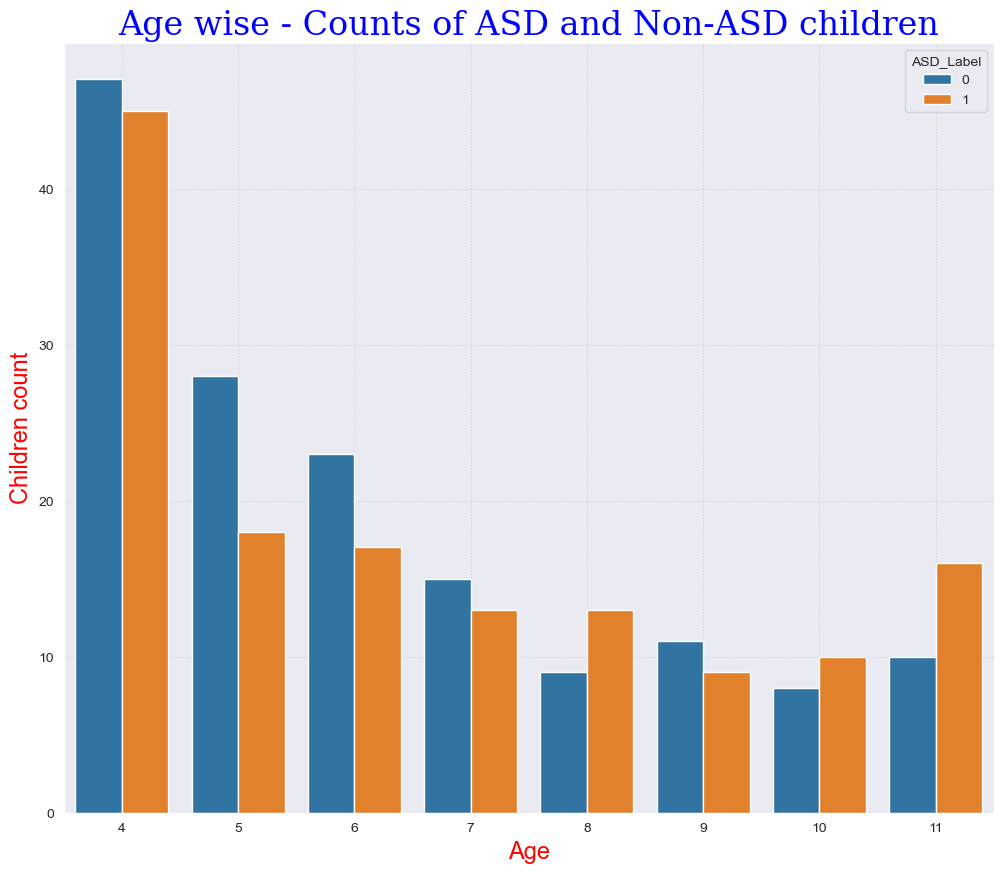

In [299]:
# Ensure that the 'ASD_Label' column is categorical
age_details['ASD_Label'] = age_details['ASD_Label'].astype(str)

# Font settings
label_fonts = {'family': 'arial', 'size': 17, 'color': 'red'}
title_font = {'family': 'serif', 'size': 24, 'color': 'Blue'}

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x=age_details['fix_age'], y=age_details['child_counts'], hue=age_details['ASD_Label'])
plt.minorticks_on()
plt.grid(which='major', linestyle=':', color='lightgray')
plt.xlabel('Age', fontdict=label_fonts)
plt.ylabel('Children count', fontdict=label_fonts)
plt.title('Age wise - Counts of ASD and Non-ASD children', fontdict=title_font)

plt.show()


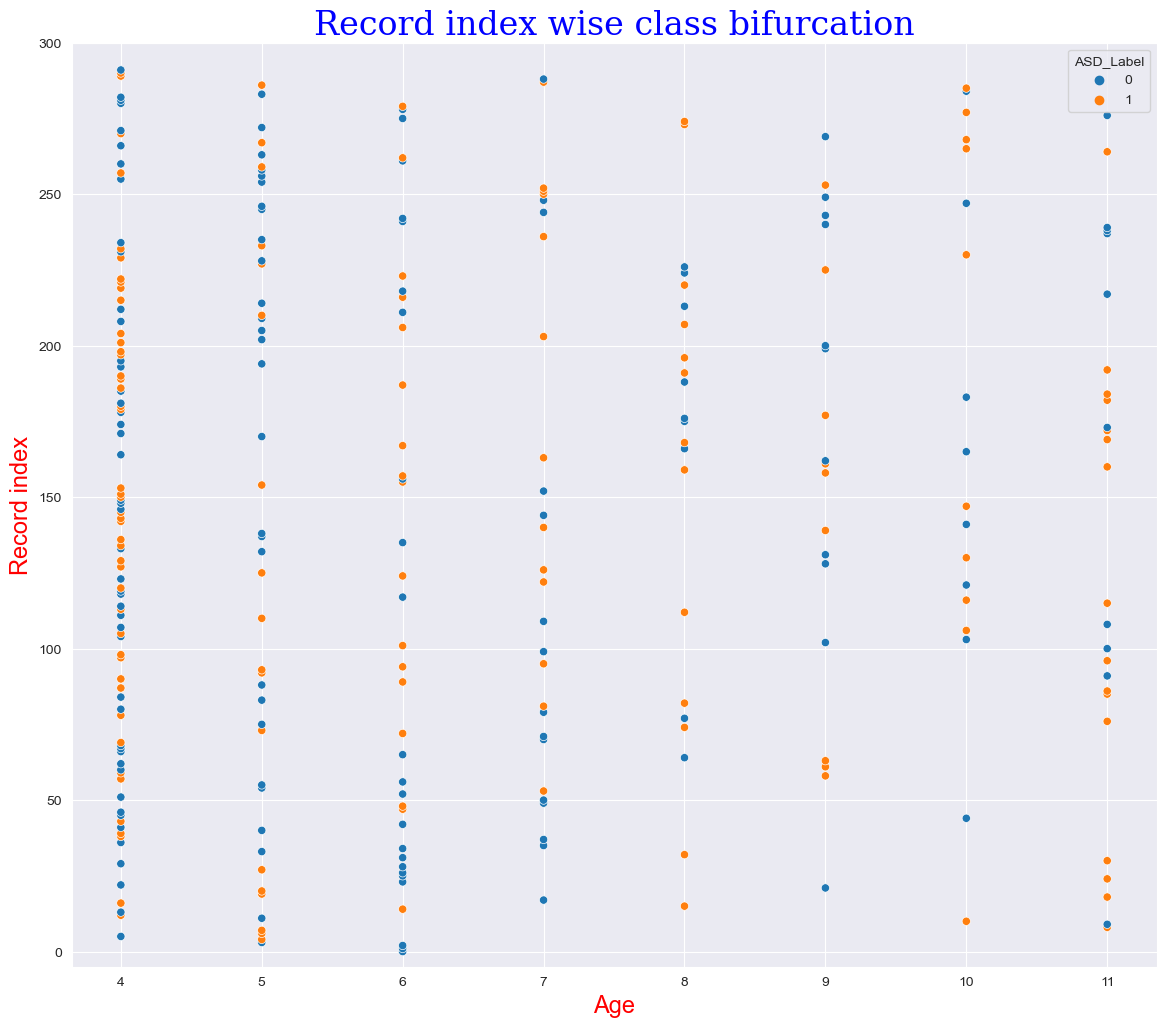

In [300]:
plt.figure(figsize=(14, 12))
sns.set_style('darkgrid')

# Corrected scatterplot without `x_bins`
sns.scatterplot(x=autism_df['fix_age'], y=autism_df.index, hue=autism_df['ASD_Label'], legend='brief')

plt.minorticks_on()
plt.axis(ymin=-5, ymax=300)
plt.xlabel('Age', fontdict=label_fonts)
plt.ylabel('Record index', fontdict=label_fonts)
plt.title('Record index wise class bifurcation', fontdict=title_font)
plt.show()


### ***Q3. Does GENDER corresponds to ASD in children?***

In [301]:
pd.DataFrame(autism_df['gender'].value_counts())

,count
gender,
1,208
0,84


In [302]:
pd.DataFrame(autism_df.groupby(['gender','ASD_Label']).count()['fix_age'])

fix_age
gender ASD_Label         
0      0               46
       1               38
1      0              105
       1              103

In [303]:
gender_details = pd.DataFrame(autism_df.groupby(['gender','ASD_Label']).count()['fix_age'])

In [304]:
gender_details.columns = ['gender_wise_count']

In [305]:
gender_details.reset_index(inplace=True)

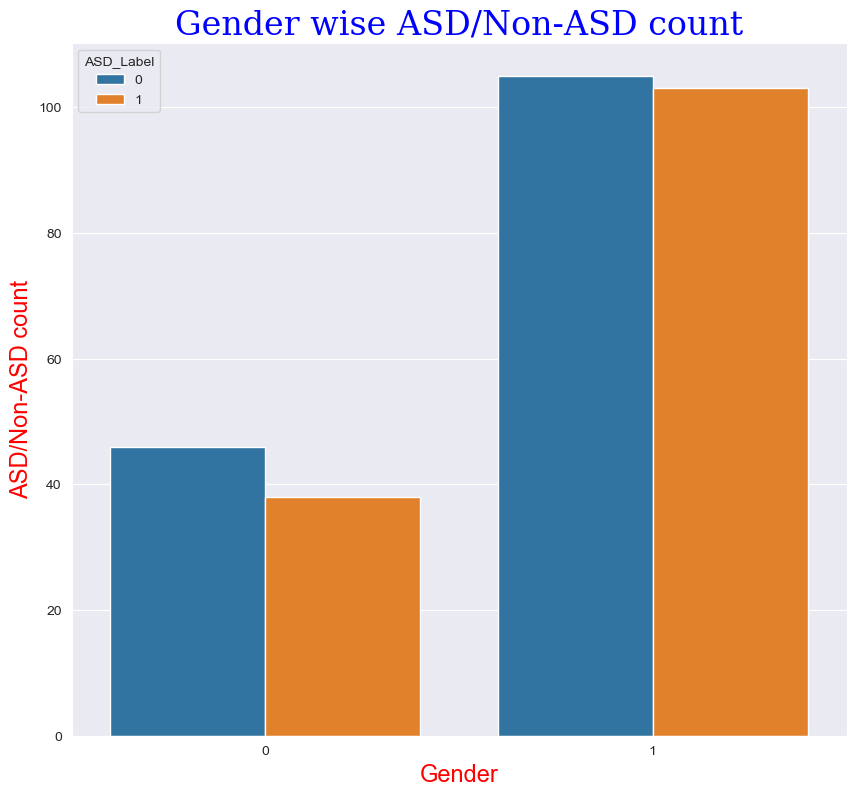

In [306]:
# Convert 'ASD_Label' to string to avoid AttributeError
gender_details['ASD_Label'] = gender_details['ASD_Label'].astype(str)

plt.figure(figsize=(10, 9))
sns.barplot(x=gender_details['gender'], y=gender_details['gender_wise_count'], hue=gender_details['ASD_Label'])
plt.minorticks_on()
plt.xlabel('Gender', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD count', fontdict=label_fonts)
plt.title('Gender wise ASD/Non-ASD count', fontdict=title_font)
plt.show()

### ***Q4. Does children of every country are affected with ASD?***

In [307]:
pd.DataFrame(autism_df['country'].value_counts())

,count
country,
9,80
0,49
2,42
1,42
3,23
4,20
5,13
6,9
8,7


In [308]:
pd.DataFrame(autism_df.groupby(['country','ASD_Label']).count()['fix_age'])

fix_age
country ASD_Label         
0       0               25
        1               24
1       0               25
        1               17
2       0               11
        1               31
3       0               11
        1               12
4       0               15
        1                5
5       0                8
        1                5
6       0                3
        1                6
7       0                2
        1                5
8       0                7
9       0               44
        1               36

In [309]:
country_details = pd.DataFrame(autism_df.groupby(['country','ASD_Label']).count()['fix_age'])
country_details.columns = ['Country_wise_count']
country_details.reset_index(inplace=True)

In [310]:
country_details

,country,ASD_Label,Country_wise_count
0,0,0,25
1,0,1,24
2,1,0,25
3,1,1,17
4,2,0,11
5,2,1,31
6,3,0,11
7,3,1,12
8,4,0,15
9,4,1,5


In [311]:
country_details['country_name'] = country_details['country'].map({0:'United Kingdom',1:'India',2:'United States',3:'Australia',4:'Jordan',5:'New Zealand',6:'Egypt',7:'Canada',
                                                                  8:'UAE',9:'Others'})

In [312]:
country_details

,country,ASD_Label,Country_wise_count,country_name
0,0,0,25,United Kingdom
1,0,1,24,United Kingdom
2,1,0,25,India
3,1,1,17,India
4,2,0,11,United States
5,2,1,31,United States
6,3,0,11,Australia
7,3,1,12,Australia
8,4,0,15,Jordan
9,4,1,5,Jordan


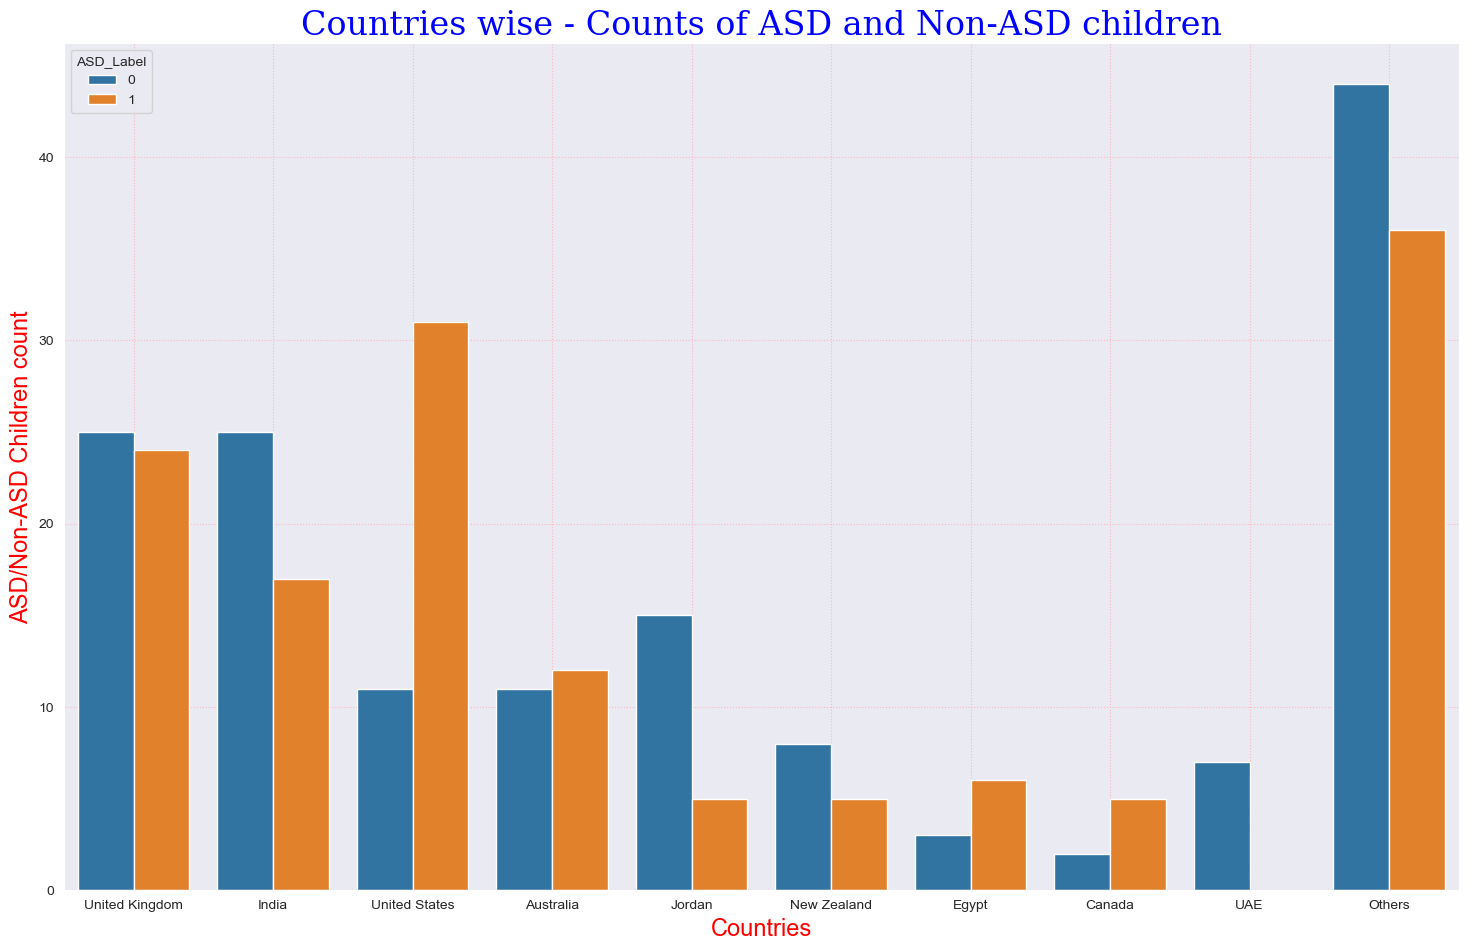

In [313]:
# Convert 'ASD_Label' to string to avoid AttributeError
country_details['ASD_Label'] = country_details['ASD_Label'].astype(str)

plt.figure(figsize=(18, 11))
sns.barplot(
    x=country_details['country_name'], 
    y=country_details['Country_wise_count'], 
    hue=country_details['ASD_Label']
)
plt.minorticks_on()
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel('Countries', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('Countries wise - Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


### ***Q5. Does BIRTH JAUNDICE corresponds to ASD?***

In [314]:
pd.DataFrame(autism_df['born_with_jaundice'].value_counts())

,count
born_with_jaundice,
0,212
1,80


In [315]:
pd.DataFrame(autism_df.groupby(['born_with_jaundice','ASD_Label']).count()['fix_age'])

fix_age
born_with_jaundice ASD_Label         
0                  0              108
                   1              104
1                  0               43
                   1               37

In [316]:
jaundice_details = pd.DataFrame(autism_df.groupby(['born_with_jaundice','ASD_Label']).count()['fix_age'])
jaundice_details.columns = ['jaundice_wise_counts']
jaundice_details.reset_index(inplace=True)

In [317]:
jaundice_details

,born_with_jaundice,ASD_Label,jaundice_wise_counts
0,0,0,108
1,0,1,104
2,1,0,43
3,1,1,37


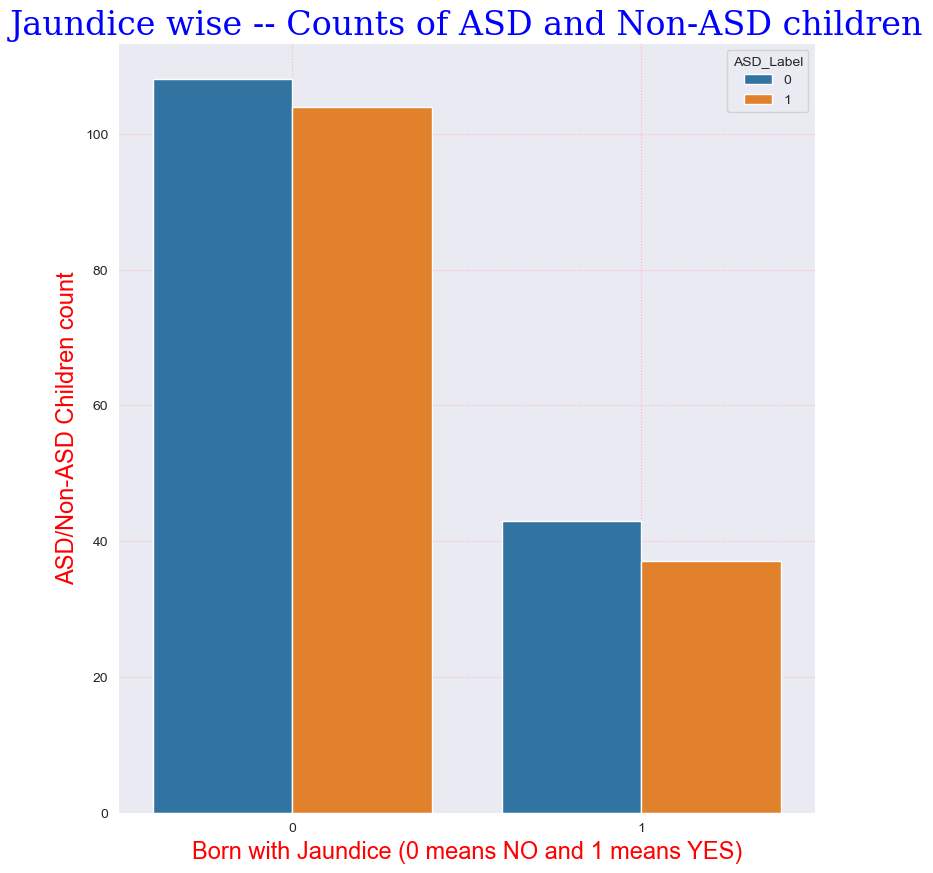

In [318]:
# Convert 'ASD_Label' to string to avoid AttributeError
jaundice_details['ASD_Label'] = jaundice_details['ASD_Label'].astype(str)

plt.figure(figsize=(9, 10))
sns.barplot(
    x=jaundice_details['born_with_jaundice'], 
    y=jaundice_details['jaundice_wise_counts'], 
    hue=jaundice_details['ASD_Label']
)
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel('Born with Jaundice (0 means NO and 1 means YES)', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('Jaundice wise -- Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


### ***Q6: Does PDD history in Family corresponds to ASD?***

In [319]:
pd.DataFrame(autism_df['family_member_with_PDD'].value_counts())

,count
family_member_with_PDD,
0,243
1,49


In [320]:
pd.DataFrame(autism_df.groupby(['family_member_with_PDD','ASD_Label']).count()['fix_age'])

fix_age
family_member_with_PDD ASD_Label         
0                      0              123
                       1              120
1                      0               28
                       1               21

In [321]:
PDD_details = pd.DataFrame(autism_df.groupby(['family_member_with_PDD','ASD_Label']).count()['fix_age'])
PDD_details.columns = ['PDD_wise_counts']
PDD_details.reset_index(inplace=True)

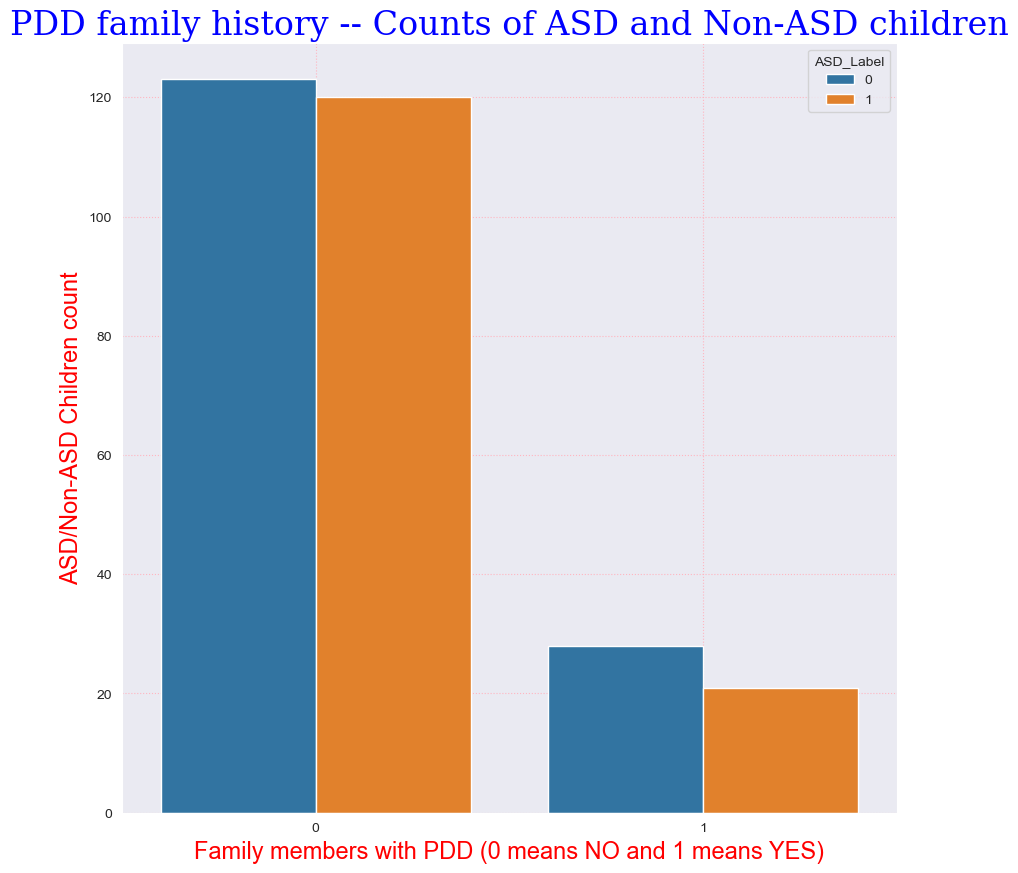

In [322]:
# Convert 'ASD_Label' to string to ensure compatibility with Seaborn
PDD_details['ASD_Label'] = PDD_details['ASD_Label'].astype(str)

plt.figure(figsize=(10, 10))
sns.barplot(
    x=PDD_details['family_member_with_PDD'], 
    y=PDD_details['PDD_wise_counts'], 
    hue=PDD_details['ASD_Label']
)
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel('Family members with PDD (0 means NO and 1 means YES)', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('PDD family history -- Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


### ***Q7: Does Usage of screening app in past relates to ASD?***

In [323]:
pd.DataFrame(autism_df['used_screening_app_before'].value_counts())

,count
used_screening_app_before,
0,281
1,11


In [324]:
pd.DataFrame(autism_df.groupby(['used_screening_app_before','ASD_Label']).count()['fix_age'])

fix_age
used_screening_app_before ASD_Label         
0                         0              144
                          1              137
1                         0                7
                          1                4

In [325]:
screening_app_details = pd.DataFrame(autism_df.groupby(['used_screening_app_before','ASD_Label']).count()['fix_age'])
screening_app_details.columns = ['Screening_app_counts']
screening_app_details.reset_index(inplace=True)

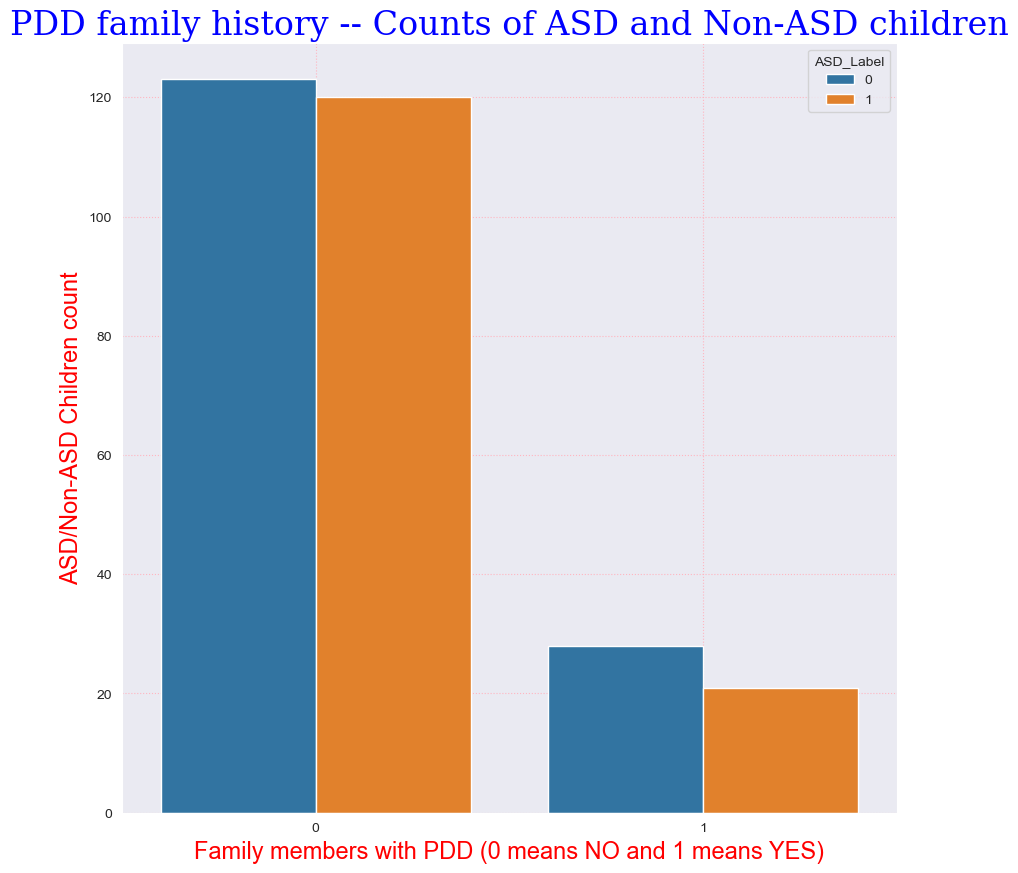

In [326]:
# Convert 'ASD_Label' to string to ensure compatibility with Seaborn
PDD_details['ASD_Label'] = PDD_details['ASD_Label'].astype(str)

plt.figure(figsize=(10, 10))
sns.barplot(
    x=PDD_details['family_member_with_PDD'], 
    y=PDD_details['PDD_wise_counts'], 
    hue=PDD_details['ASD_Label']
)
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel('Family members with PDD (0 means NO and 1 means YES)', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('PDD family history -- Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


### ***Q8: What picture screening score tells us about ASD?***

In [327]:
autism_df['screening_score'].value_counts()

screening_score
7     44
8     44
5     41
6     40
4     33
9     32
10    21
3     21
2      9
1      6
0      1
Name: count, dtype: int64

In [328]:
pd.DataFrame(autism_df.groupby(['screening_score','ASD_Label']).count()['fix_age'])

,,fix_age
screening_score,ASD_Label,
0,0,1
1,0,6
2,0,9
3,0,21
4,0,33
5,0,41
6,0,40
7,1,44
8,1,44


In [329]:
pd.DataFrame(autism_df['ASD_Label'].value_counts())

,count
ASD_Label,
0,151
1,141


### ***Q9: What 'family_member_with_PDD','born_with_jaundice' and 'Q10_Score' tells us together?***

In [330]:
pd.DataFrame(autism_df.groupby(['family_member_with_PDD','born_with_jaundice','Q10_Score','ASD_Label']).count()['fix_age'])

fix_age
family_member_with_PDD born_with_jaundice Q10_Score ASD_Label         
0                      0                  0         0               46
                                                    1                7
                                          1         0               42
                                                    1               79
                       1                  0         0               11
                                                    1                1
                                          1         0               24
                                                    1               33
1                      0                  0         0                9
                                                    1                2
                                          1         0               11
                                                    1               16
                       1                  0         0                4
                                          1         0                4
                                                    1                3

### ***Q10. Does ETHNICITY corresponds to ASD?***

In [331]:
pd.DataFrame(autism_df['fix_ethnicity'].value_counts())

,count
fix_ethnicity,
0,109
1,51
2,47
5,45
3,24
4,16


In [332]:
#'White-European':0,'Asian':1,'Middle Eastern':2,'South Asian':3,'Black':4,'Others':5
pd.DataFrame(autism_df.groupby(['fix_ethnicity','ASD_Label']).count()['fix_age'])

fix_age
fix_ethnicity ASD_Label         
0             0               47
              1               62
1             0               27
              1               24
2             0               30
              1               17
3             0               16
              1                8
4             0                7
              1                9
5             0               24
              1               21

In [333]:
ethnicity_details = pd.DataFrame(autism_df.groupby(['fix_ethnicity','ASD_Label']).count()['fix_age'])
ethnicity_details.columns = ['ethnicity_wise_counts']
ethnicity_details.reset_index(inplace=True)
ethnicity_details['name'] = ethnicity_details['fix_ethnicity'].map({0:'White-European',1:'Asian',2:'Middle Eastern',3:'South Asian',4:'Black',5:'Others'})

In [334]:
ethnicity_details

,fix_ethnicity,ASD_Label,ethnicity_wise_counts,name
0,0,0,47,White-European
1,0,1,62,White-European
2,1,0,27,Asian
3,1,1,24,Asian
4,2,0,30,Middle Eastern
5,2,1,17,Middle Eastern
6,3,0,16,South Asian
7,3,1,8,South Asian
8,4,0,7,Black
9,4,1,9,Black


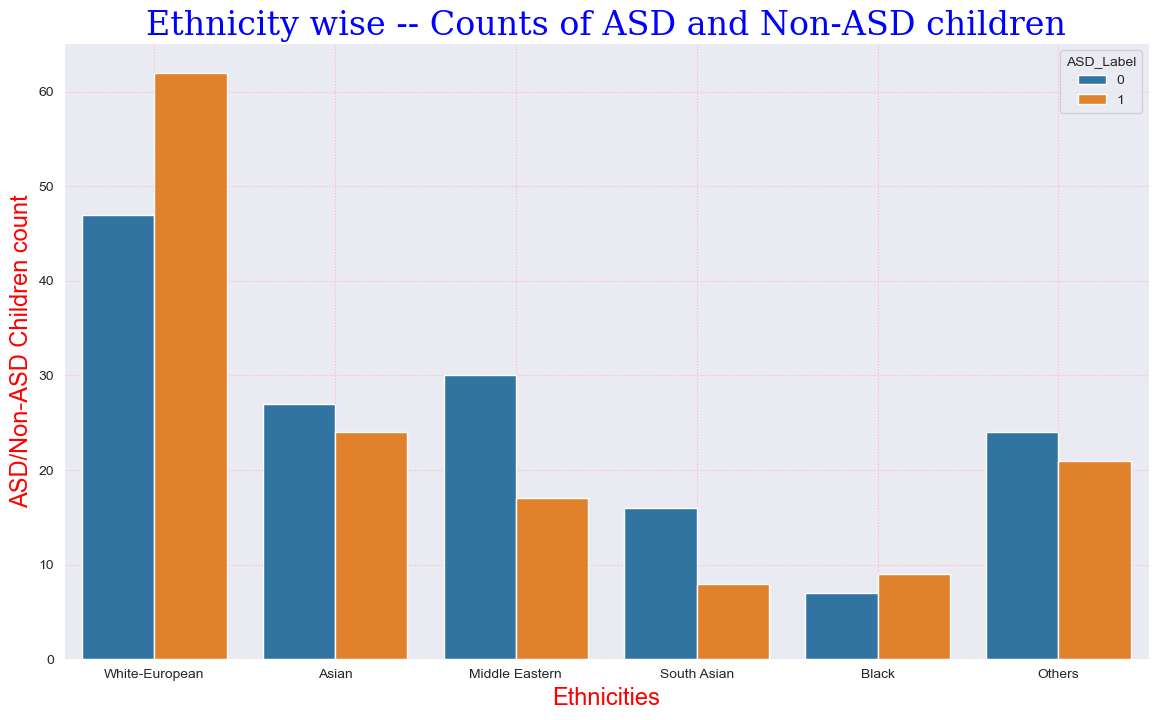

In [335]:
# Ensure 'ASD_Label' is treated as a categorical variable
ethnicity_details['ASD_Label'] = ethnicity_details['ASD_Label'].astype(str)

# Plot the barplot
plt.figure(figsize=(14, 8))
sns.barplot(
    x=ethnicity_details['name'], 
    y=ethnicity_details['ethnicity_wise_counts'], 
    hue=ethnicity_details['ASD_Label']
)
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel("Ethnicities", fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('Ethnicity wise -- Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


# ***Features Co-Relation***

/Users/malinisenthilkumar/anaconda3/envs/phd-env/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


(21.5, -0.5)

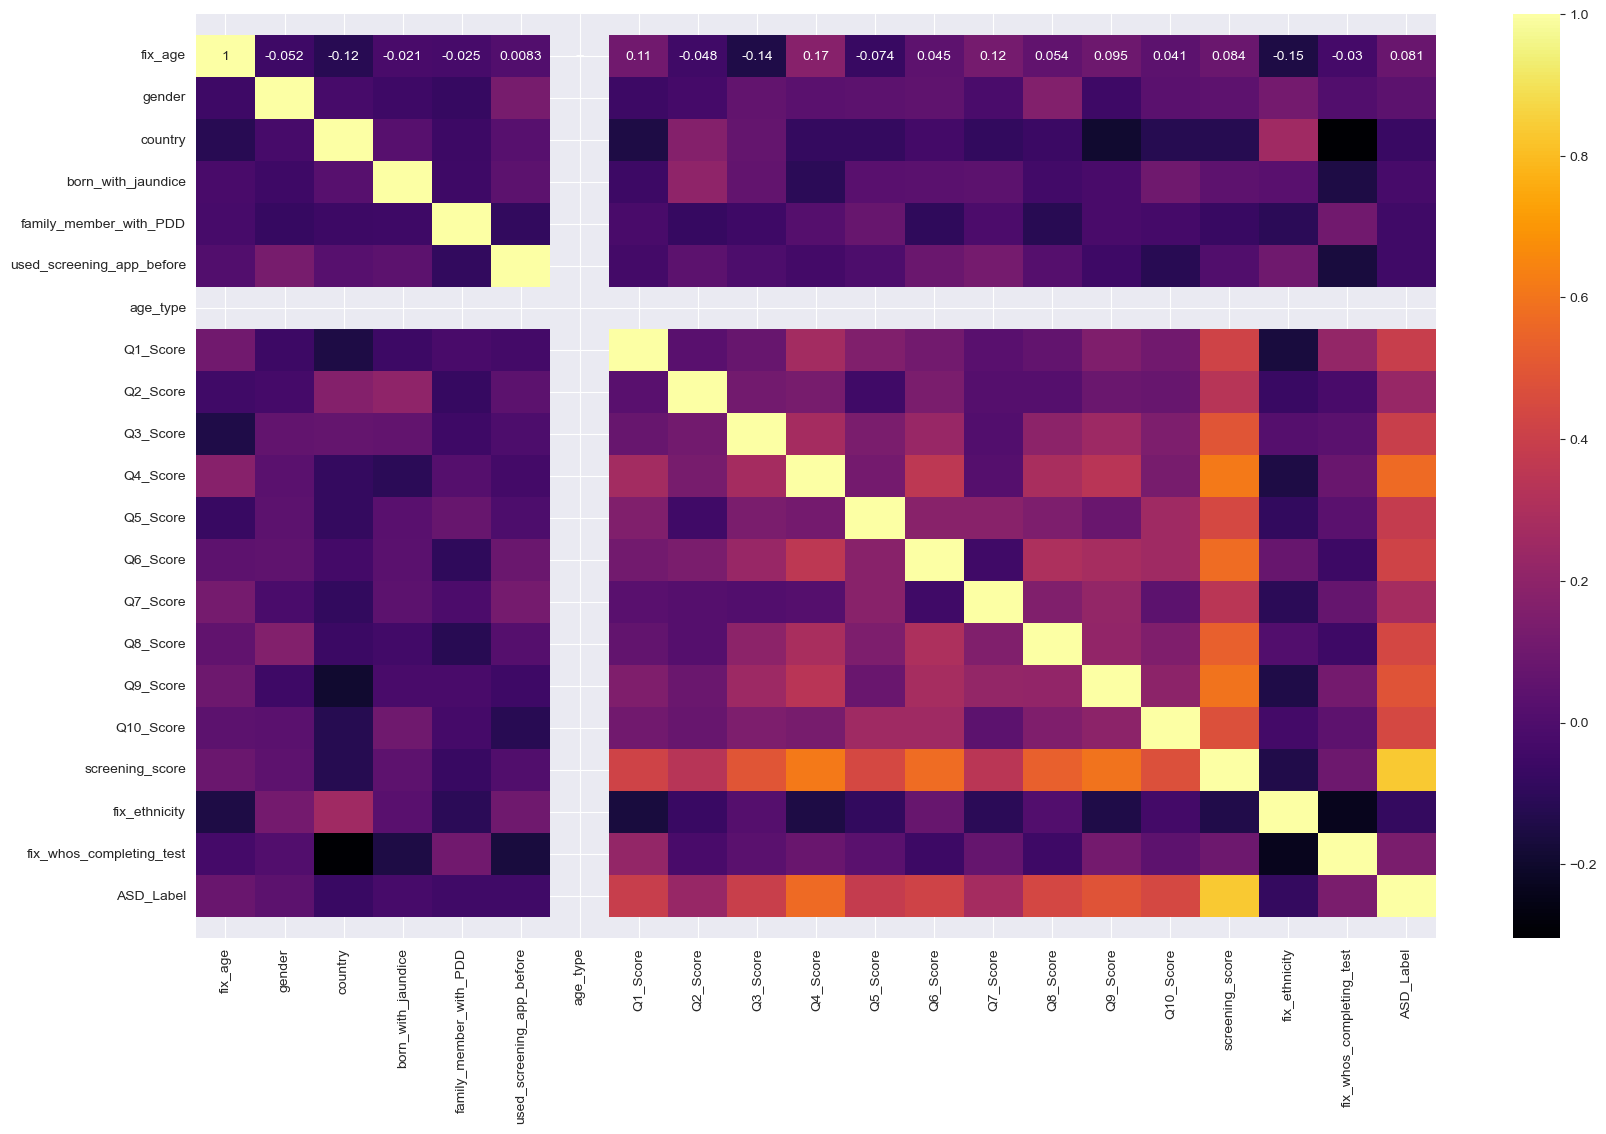

In [336]:
plt.figure(figsize=(20,12))
fig = sns.heatmap(autism_df.corr(),cmap='inferno',annot=True)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)

#### ***Dropping SCREENING_SCORE feature from the dataset as it is highly co-related with the TARGET Label***

In [337]:
autism_df.drop(['screening_score'],axis=1,inplace=True)

/var/folders/98/4q14t9j108gf7k1h62m97blr0000gn/T/ipykernel_73302/2560007290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autism_df.drop(['screening_score'],axis=1,inplace=True)


# ***Pre-Confirmatory Data Analysis or Comparative Models Assessment***

## ***Import Machine Learning Classifiers***

In [359]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score as acc_scr
from sklearn.metrics import recall_score as rec_scr
from sklearn.metrics import precision_score as prec_scr
from sklearn.metrics import roc_curve, roc_auc_score, auc,precision_recall_curve as prec_rec_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
from tensorflow import keras

In [360]:
autism_df.columns

Index(['fix_age', 'gender', 'country', 'born_with_jaundice',
       'family_member_with_PDD', 'used_screening_app_before', 'age_type',
       'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score',
       'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score', 'fix_ethnicity',
       'fix_whos_completing_test', 'ASD_Label'],
      dtype='object')

In [361]:
# Split the dataset into features and target variable
X = autism_df.drop('ASD_Label', axis=1)
y = autism_df['ASD_Label']

In [362]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   fix_age                    292 non-null    int64
 1   gender                     292 non-null    int64
 2   country                    292 non-null    int64
 3   born_with_jaundice         292 non-null    int64
 4   family_member_with_PDD     292 non-null    int64
 5   used_screening_app_before  292 non-null    int64
 6   age_type                   292 non-null    int64
 7   Q1_Score                   292 non-null    int64
 8   Q2_Score                   292 non-null    int64
 9   Q3_Score                   292 non-null    int64
 10  Q4_Score                   292 non-null    int64
 11  Q5_Score                   292 non-null    int64
 12  Q6_Score                   292 non-null    int64
 13  Q7_Score                   292 non-null    int64
 14  Q8_Score                  

In [363]:
# Random-Oversampling

a1=X
b1=y
ros = RandomOverSampler(sampling_strategy="minority")
X, y = ros.fit_resample(a1, b1)
X.shape[0] - a1.shape[0]

10

In [364]:
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
#X = scaler.fit_transform(X)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

In [365]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [366]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(192, 19) (61, 19) (192,) (61,)


In [367]:
# Convert the datasets to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [368]:
# Batch and shuffle the datasets
batch_size = 10
train_dataset = train_dataset.shuffle(len(X_train)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

## III. Base Neural Network Model

In [369]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [370]:
#Input Size
X_train.shape[1]

19

In [371]:
# Define the model architecture
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

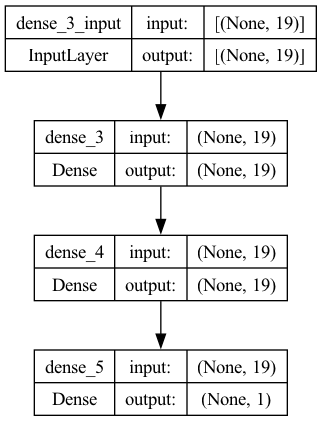

In [372]:
plot_model(model, to_file='model.png', show_shapes=True)

In [373]:
# Compile model
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [374]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10, verbose=1)
history = model.fit(train_dataset, 
                    validation_data=val_dataset, epochs=150, callbacks=[early_stop])

Epoch 1/150
20/20 [==============================] - 0s 3ms/step - loss: 0.7559 - accuracy: 0.4323 - val_loss: 0.7680 - val_accuracy: 0.3469
Epoch 2/150
20/20 [==============================] - 0s 801us/step - loss: 0.6782 - accuracy: 0.5833 - val_loss: 0.7002 - val_accuracy: 0.4490
Epoch 3/150
20/20 [==============================] - 0s 755us/step - loss: 0.6225 - accuracy: 0.6979 - val_loss: 0.6477 - val_accuracy: 0.5714
Epoch 4/150
20/20 [==============================] - 0s 740us/step - loss: 0.5747 - accuracy: 0.7500 - val_loss: 0.5996 - val_accuracy: 0.6531
Epoch 5/150
20/20 [==============================] - 0s 733us/step - loss: 0.5266 - accuracy: 0.7812 - val_loss: 0.5514 - val_accuracy: 0.7347
Epoch 6/150
20/20 [==============================] - 0s 757us/step - loss: 0.4767 - accuracy: 0.7969 - val_loss: 0.5082 - val_accuracy: 0.7551
Epoch 7/150
20/20 [==============================] - 0s 742us/step - loss: 0.4310 - accuracy: 0.8333 - val_loss: 0.4689 - val_accuracy: 0.7755
E

In [375]:
#Evaluate model on validation set
val_loss, val_acc = model.evaluate(X_val, y_val)

print('Val Loss:', val_loss)
print('Val Accuracy:', val_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9796
Val Loss: 0.10804011672735214
Val Accuracy: 0.9795918464660645


In [376]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9508
Test Loss: 0.11662822961807251
Test Accuracy: 0.9508196711540222


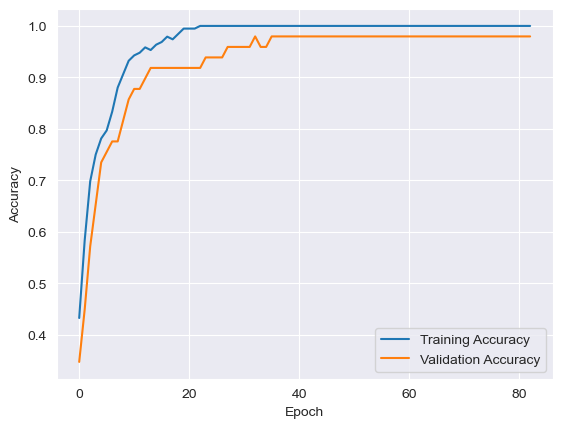

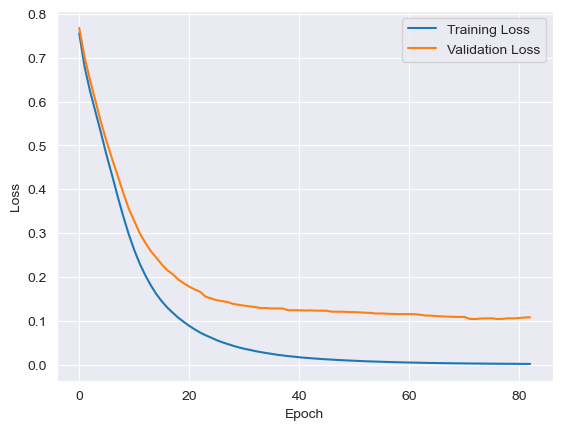

In [ ]:
# Accuracy vs Epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss vs Epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [387]:
y_pred_m1 = model.predict(X_test)
y_pred_m1 = np.round(y_pred_m1)

2/2 [==============================] - 0s 1ms/step


In [388]:
print(classification_report(y_test, y_pred_m1))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.93      0.96      0.95        28

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



## IV. Improved Network Architecture 

In [378]:
# Define the model architecture
model2 = Sequential()
model2.add(Dense(31, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=keras.regularizers.l2(0.03)))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

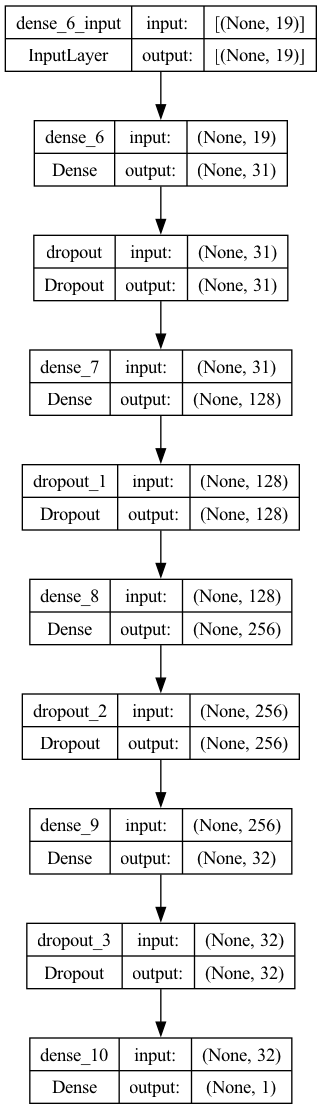

In [379]:
plot_model(model2, to_file='model.png', show_shapes=True)

In [380]:
# Compile model
model2.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.0004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon= 1e-07,
    amsgrad=False,
    weight_decay= 1e-6,
    use_ema = True,
    ema_momentum = 0.8,
    ema_overwrite_frequency = 10,
    jit_compile=True,
    ),loss='binary_crossentropy', metrics=['accuracy'])

In [381]:
early_stop = EarlyStopping(patience=20, verbose=1)
history = model2.fit(train_dataset, 
                    validation_data=val_dataset, epochs=250, 
                    batch_size=8)

Epoch 1/250
20/20 [==============================] - 0s 3ms/step - loss: 1.3960 - accuracy: 0.5208 - val_loss: 1.3732 - val_accuracy: 0.5714
Epoch 2/250
20/20 [==============================] - 0s 1ms/step - loss: 1.3425 - accuracy: 0.6146 - val_loss: 1.3170 - val_accuracy: 0.7347
Epoch 3/250
20/20 [==============================] - 0s 1ms/step - loss: 1.2896 - accuracy: 0.7135 - val_loss: 1.2591 - val_accuracy: 0.7551
Epoch 4/250
20/20 [==============================] - 0s 2ms/step - loss: 1.2565 - accuracy: 0.7135 - val_loss: 1.2063 - val_accuracy: 0.7551
Epoch 5/250
20/20 [==============================] - 0s 1ms/step - loss: 1.1928 - accuracy: 0.7917 - val_loss: 1.1519 - val_accuracy: 0.7959
Epoch 6/250
20/20 [==============================] - 0s 954us/step - loss: 1.1416 - accuracy: 0.7448 - val_loss: 1.1055 - val_accuracy: 0.7755
Epoch 7/250
20/20 [==============================] - 0s 965us/step - loss: 1.0614 - accuracy: 0.8125 - val_loss: 1.0301 - val_accuracy: 0.7959
Epoch 8/2

## V. Model Evaluation

In [382]:
#Evaluate model on validation set
val_loss, val_acc = model2.evaluate(X_val, y_val)

print('Val Loss:', val_loss)
print('Val Accuracy:', val_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 1.0000
Val Loss: 0.05490068346261978
Val Accuracy: 1.0


In [383]:
# Evaluate model on test set
test_loss, test_acc = model2.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9836
Test Loss: 0.06904032826423645
Test Accuracy: 0.9836065769195557


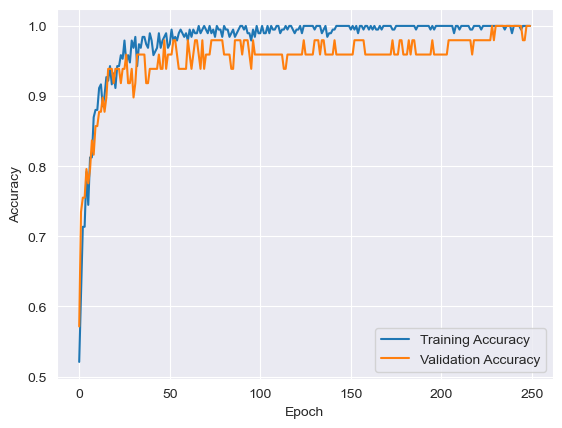

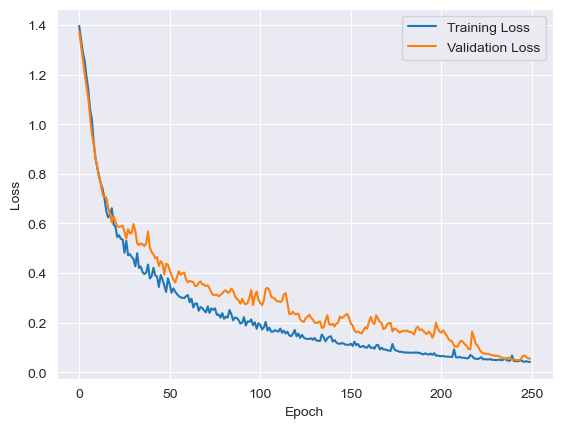

In [384]:
# Accuracy vs Epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss vs Epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_m2 = model2.predict(X_test)
y_pred_m2 = np.round(y_pred_m2)

2/2 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred_m2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.96      0.98        28

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61

